<a href="https://colab.research.google.com/github/Siddhant-K-code/Pandemic-Simulator/blob/master/Sim_centered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
''' from google.colab import files
uploaded = files.upload() # Upload plot1.txt file
 '''

' from google.colab import files\nuploaded = files.upload() # Upload plot1.txt file\n '

In [ ]:
spread_limit = 10
recovery_prob = 0.70
intial_count = 10
infection_rate = 0.5
population = 1000

In [ ]:
landmark = [(50,50),(10,10),(90,90)]
landmark_prob = 0.1
landmark_prob_dec_rate = 0.8
landmark_prob_values = []

In [ ]:
def initialize():
    global infected_count,dead_count,recovered_count,infected,pos,infected_count_arr,dead_count_arr,recovered_count_arr,non_infected_count_arr 
    pos = pd.DataFrame()
    pos['x'] =[]
    pos['y'] =[]

    infected = pd.DataFrame()
    infected['x'] = []
    infected['y'] = []
    infected['time'] = []

    infected_count = intial_count
    dead_count = 0
    recovered_count = 0


    infected_count_arr = []
    dead_count_arr = []
    recovered_count_arr = []
    non_infected_count_arr = []
    landmark_prob_values = []

    for i in range(population):
        pos.loc[i]=[random.randint(0, population/10),random.randint(0, population/10)]


    for i in range(10):
        infected.loc[i]= [pos['x'][i],pos['y'][i],1]

    pos = pos.iloc[10:]
    pos = pos.reset_index(drop=True)

In [ ]:
def distance(pos1,pos2):
    return ((infected['x'][pos2]-pos['x'][pos1])**2)+((infected['y'][pos2]-pos['y'][pos1])**2)

In [ ]:
def infected_check():
    return (random.random()<infection_rate)

In [ ]:
def move_around():
    global landmark_prob,landmark_prob_values
    for i in range(len(pos['x'])):
        if(random.random()<landmark_prob):
            x,y = landmark[random.randint(0, len(landmark)-1)]
            pos.loc[i]=[x,y]
        else:     
            pos.loc[i]=[random.randint(0, population/10),random.randint(0, population/10)]
    landmark_prob = landmark_prob* landmark_prob_dec_rate
    landmark_prob_values.append(landmark_prob)

In [ ]:
def day():
    global infected_count,dead_count,recovered_count,infected,pos #getting global data
    infected_count_arr.append(infected_count)
    non_infected_count_arr.append(len(pos['x']))
    dead_count_arr.append(dead_count)
    recovered_count_arr.append(recovered_count)
    # increase infected time and remove necessary
    for i in range(len(infected['time'])):
        infected['time'][i]= infected['time'][i] +1
        if (infected['time'][i]>3):
            infected = infected.drop(i)
            removed()
    # set new loction for all not infected
    infected = infected.reset_index(drop=True)
    infected_count = len(infected['time'])  
    i = 0
    move_around()
    i = 0
    move_around()
    to_drop = []
    while(i < len(pos['x'])):
        for j in range(infected_count):
            if(i>=len(pos['x'])):
                break
            if(distance(i,j)< spread_limit):
                if(infected_check()):
                    infected.loc[infected_count]= [pos['x'][i],pos['y'][i],1]
                    infected_count = infected_count + 1  
                    to_drop.append(i)      
        i = i +1     
    pos = pos.drop(to_drop)
    pos = pos.reset_index(drop=True) 

In [ ]:
def removed():
    if(random.random()<recovery_prob):
        global recovered_count
        recovered_count = recovered_count + 1
    else :
        global dead_count
        dead_count = dead_count + 1

In [ ]:
def day_call():
    initialize()
    while(infected_count != 0 ):
        day()

# Get plot an data for a virtual environment of a given parameter

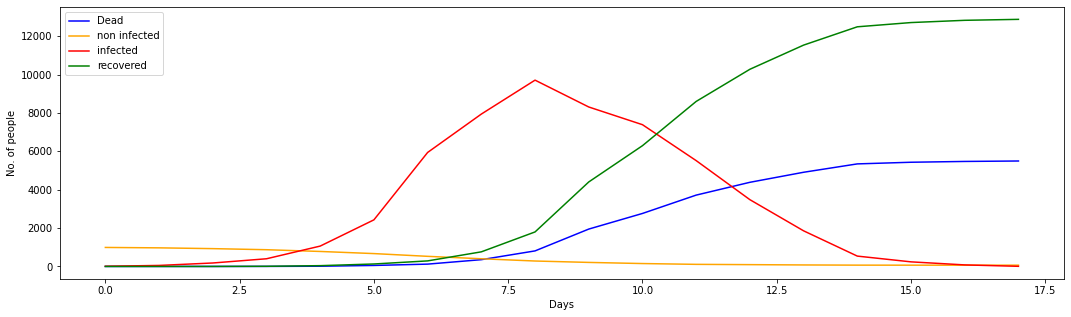

In [ ]:
day_call()

name = "plot 1"
my_file = open(name + ".txt","w")
txt = "There are landmark(market,theatre,religious centres).If an infected person goes there the chances of spread increases to a great extend.The probability of visiting the landmark decreases with time,as people realize the danger. \n\n"
txt = txt +"Parameters:\n spread_limit = {}\n recovery_prob = {}\n intial_count = {}\n infection_rate = {}\n ".format(spread_limit,recovery_prob,intial_count,infection_rate)
txt = txt + "population = {}\n landmark = {}\n  landmark_prob = {}\n landmark_prob_dec_rate = {}\n ".format(population,landmark,landmark_prob,landmark_prob_dec_rate,)
my_file.write(txt)

fig = plt.figure(figsize=(len(dead_count_arr), 5))
ax = fig.add_subplot(111)
ax.plot(dead_count_arr,color='blue')
ax.plot(non_infected_count_arr,color='orange' )
ax.plot(infected_count_arr,color='red' )
ax.plot(recovered_count_arr,color='green')

plt.gca().legend(['Dead', 'non infected','infected', 'recovered'], loc='best')
plt.xlabel("Days")
plt.ylabel("No. of people")
plt.savefig(name+ ".pdf")
# ax.show()

# Change in total involved,safe,and days taken with change in spread_limit

In [ ]:
total_involed = []
total_safe = []
days = []
spread_limit_values = []
def spread_limit_change():
    global spread_limit
    spread_limit = 1
    for i in range(16):    
        day_call()
        total_involed.append(recovered_count + dead_count)
        total_safe.append(population - recovered_count - dead_count)
        days.append(len(recovered_count_arr))
        spread_limit_values.append(spread_limit)
        spread_limit = spread_limit + 1
    
spread_limit_change()

txt="PEOPLE SPREAD_LIMIT_VARIABLE(1,16)  recovery_prob = {} intial_count = {} infection_rate = {} ".format(recovery_prob,intial_count,infection_rate)
plt.plot(spread_limit_values,total_involed ,color='blue')
plt.plot(spread_limit_values,total_safe,color='orange' )
plt.xlabel("SPREAD_LIMIT_VALUE")
plt.ylabel("No. of people")
plt.legend(['total_involed', 'total_safe'], loc='best')
plt.title( txt)
plt.savefig(txt+ ".pdf")
plt.show()

txt="DAYS SPREAD_LIMIT_VARIABLE(1,16)  recovery_prob = {} intial_count = {} infection_rate = {} ".format(recovery_prob,intial_count,infection_rate)
plt.plot(spread_limit_values,days)
plt.xlabel("SPREAD_LIMIT_VALUE")
plt.ylabel("Days")
plt.title( txt)
plt.savefig(txt+ ".pdf")
plt.show()

# Change in total involved,safe,and days taken with change in intial_count

In [ ]:
total_involed = []
total_safe = []
days = []
intial_count_values = []
def intial_count_change():
    global intial_count
    intial_count = 10
    for i in range(16):    
        day_call()
        total_involed.append(recovered_count + dead_count)
        total_safe.append(population - recovered_count - dead_count)
        days.append(len(recovered_count_arr))
        intial_count_values.append(intial_count)
        intial_count = intial_count + 1
    
intial_count_change()

txt="PEOPLE INITIAL_COUNT_VARIABLE(10,25,step = 1)  recovery_prob = {} intial_count = {} infection_rate = {} ".format(recovery_prob,intial_count,infection_rate)
plt.plot(intial_count_values,total_involed ,color='blue')
plt.plot(intial_count_values,total_safe,color='orange' )
plt.xlabel("INITIAL_COUNT_VALUE")
plt.ylabel("No. of people")
plt.legend(['total_involed', 'total_safe'], loc='best')
plt.title( "Description in file name")
plt.savefig(txt+ ".pdf")
plt.show()

txt="DAYS INITIAL_COUNT_VARIABLE(10,40,step = 1)  recovery_prob = {} intial_count = {} infection_rate = {} ".format(recovery_prob,intial_count,infection_rate)
plt.plot(intial_count_values,days)
plt.xlabel("INITIAL_COUNT_VALUE")
plt.ylabel("Days")
plt.title( "Description in file name")
plt.savefig(txt+ ".pdf")
plt.show()

# Change in total involved,safe,and days taken with change in infection_rate

In [ ]:
total_involed = []
total_safe = []
days = []
infection_rate_values = []
def infection_rate_change():
    global infection_rate
    infection_rate = 0.10
    for i in range(18):    
        day_call()
        total_involed.append(recovered_count + dead_count)
        total_safe.append(population - recovered_count - dead_count)
        days.append(len(recovered_count_arr))
        infection_rate_values.append(infection_rate)
        infection_rate = infection_rate + 0.05
    
infection_rate_change()

txt="PEOPLE INFECTION_RATE_VARIABLE(0.1,1,step =.05)  recovery_prob = {} intial_count = {} spread_limit = {} ".format(recovery_prob,intial_count,spread_limit)
plt.plot(infection_rate_values,total_involed ,color='blue')
plt.plot(infection_rate_values,total_safe,color='orange' )
plt.xlabel("INFECTION_RATE_VALUE")
plt.ylabel("No. of people")
plt.legend(['total_involed', 'total_safe'], loc='best')
plt.title( "Description in file name")
plt.savefig(txt+ ".pdf")
plt.show()

txt="DAYS INFECTION_RATE_VARIABLE(0.1,1,step =.05) recovery_prob = {} intial_count = {} spread_limit = {} ".format(recovery_prob,intial_count,spread_limit)
plt.plot(infection_rate_values,days)
plt.xlabel("INFECTION_RATE_VALUE")
plt.ylabel("Days")
plt.title( "Description in file name")
plt.savefig(txt+ ".pdf")
plt.show()